In [2]:
import numpy as np
import pandas as pd
import scripts as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

prefix = 'python'

pd.set_option('display.max_rows', 500)
idxFigure = 1

## Abertura dos arquivos

In [3]:
dataAnswers = pd.read_csv('data/{}/Answers.csv'.format(prefix), encoding='latin-1')
dataQuestions = pd.read_csv('data/{}/Questions.csv'.format(prefix), encoding='latin-1')
dataTags = pd.read_csv('data/{}/Tags.csv'.format(prefix))

len(dataAnswers), len(dataQuestions), len(dataTags)

(987122, 607282, 1885078)

## Remover todos os valores nulos do conjunto de dados

In [4]:
dataAnswers = dataAnswers.dropna()
dataQuestions = dataQuestions.dropna()
dataTags = dataTags.dropna()

len(dataAnswers), len(dataQuestions), len(dataTags)

(981755, 601070, 1884635)

## Informações sobre os conjuntos de dados

In [5]:
dataAnswers.info(), dataQuestions.info(), dataTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981755 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            981755 non-null  int64  
 1   OwnerUserId   981755 non-null  float64
 2   CreationDate  981755 non-null  object 
 3   ParentId      981755 non-null  int64  
 4   Score         981755 non-null  int64  
 5   Body          981755 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 52.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 601070 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            601070 non-null  int64  
 1   OwnerUserId   601070 non-null  float64
 2   CreationDate  601070 non-null  object 
 3   Score         601070 non-null  int64  
 4   Title         601070 non-null  object 
 5   Body          601070 non-null  object 
dtypes: float

(None, None, None)

## Adição das colunas: ano, mes e dia

In [6]:
dateQuestion = sc.getDateFormat(dataQuestions['CreationDate'].values)
dateAnswer = sc.getDateFormat(dataAnswers['CreationDate'].values)

dataQuestions['ano'] = dateQuestion[0][0][0]
dataQuestions['mes'] = dateQuestion[0][0][1]
dataQuestions['dia'] = dateQuestion[0][0][2]

dataAnswers['ano'] = dateAnswer[0][0][0]
dataAnswers['mes'] = dateAnswer[0][0][1]
dataAnswers['dia'] = dateAnswer[0][0][2]

## Tamanho dos conjuntos por ano

In [7]:
print('\t\tQuestões:\t\tPerguntas:')
for ano in range(2008, 2016+1):
    print('ano: {}\ttamanho: {}\t\ttamanho: {}'.format(ano, len(dataQuestions.loc[(dataQuestions['ano'] == ano)]), len(dataAnswers.loc[(dataAnswers['ano'] == ano)])))

		Questões:		Perguntas:
ano: 2008	tamanho: 1824		tamanho: 6847
ano: 2009	tamanho: 11461		tamanho: 35954
ano: 2010	tamanho: 26047		tamanho: 60370
ano: 2011	tamanho: 40391		tamanho: 83470
ano: 2012	tamanho: 60662		tamanho: 113695
ano: 2013	tamanho: 89375		tamanho: 149872
ano: 2014	tamanho: 109148		tamanho: 164860
ano: 2015	tamanho: 132161		tamanho: 193869
ano: 2016	tamanho: 130001		tamanho: 172818


## Total de questões para cada ano

In [8]:
dataQuestions['ano'].value_counts()

2015    132161
2016    130001
2014    109148
2013     89375
2012     60662
2011     40391
2010     26047
2009     11461
2008      1824
Name: ano, dtype: int64

## Estamos considerando que um usuário não novato (usuario veterano), os usuários do ano de 2008

In [9]:
veterans = dataQuestions.loc[(dataQuestions['ano'] == 2008) | (dataQuestions['ano'] == 2009) | (dataQuestions['ano'] == 2010), 'OwnerUserId'].unique().tolist()

len(veterans)

13805

## Total de novatos nos anos

In [10]:
dataQuestions['Body'] = dataQuestions['Body'].str.lower()

In [11]:
data = []
repeatNewer = []
libTerms = [
    ['sklearn', 'scikit-learn', 'scikits learn'], 
    ['matplotlib'], 
    ['pandas'],
    ['numpy'],
    ['flasky'],
    ['NuPIC'],
    ['Ramp'],
    ['SymPy'],
    ['Seaborn'],
    ['BeautifulSoup'],
    ['Pyglet'],
    ['Scrapy'],
    ['PyGame'],
    ['Python Twisted'],
    ['Pillow'],
    ['TensorFlow', 'Tensor Flow'],
    ['SciPy', 'Sci py'],
    ['keras'],
    ['pickle'],
    ['math'],
    ['random'],
    ['socket'],
    ['sys'],
    ['venv'],
]

for libs in libTerms:
    dataTopic = []
    newers = {}
    
    for lib in libs:
        dataQuestions['lib'] = dataQuestions['Body'].map(lambda val: val.count(lib.lower())>0)
        
        if len(dataTopic) > 1:
            dataTopic.loc[dataTopic['lib'] == False, 'lib'] = dataQuestions.loc[dataQuestions['lib'] == True]
        else:
            dataTopic = dataQuestions.loc[dataQuestions['lib'] == True]

    for ano in range(min(dataQuestions['ano'])+1, max(dataQuestions['ano'])+1):
        dataAno = dataTopic.loc[dataTopic['ano'] == ano]

        if len(dataAno) < 1:

            for mes in range(1, 13):
                data.append([prefix, libs[0], ano, mes, 0])
        
        else:

            for mes in range(min(dataQuestions['mes']), max(dataQuestions['mes'])+1):
                dataMes = dataAno.loc[dataAno['mes'] == mes]
                qtdNewComers = 0

                if len(dataMes) < 1:
                    data.append([prefix, libs[0], ano, mes, qtdNewComers])
                
                else:
                    for question in dataMes.values:
                        
                        if question[1] not in veterans:
                            qtdNewComers += 1

                            if question[1] not in newers:
                                newers[question[1]] = 1
                            else:
                                newers[question[1]] += 1
                        
                    data.append([prefix, libs[0], ano, mes, qtdNewComers])

    for newer in newers:
        repeatNewer.append([prefix, libs[0], newer, newers[newer]])

dataLanguage = pd.DataFrame(data, columns=['Language', 'Lib', 'Year', 'Month', 'NewCommers'])
dataNewerRepeat = pd.DataFrame(repeatNewer, columns=['Language', 'Lib', 'Newer', 'Repeat'])

c:\ferramentass\Python3.9\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [12]:
resultRepeat = []
resultNewers = []
labelRepeat = []

for term in libTerms:
    print('Lib', term[0])
    print('\tQtd total de novatos: ', dataLanguage.loc[dataLanguage['Lib'] == term[0], 'NewCommers'].sum())
    print('\tQtd max de novatos em um mês: ', max(dataLanguage.loc[dataLanguage['Lib'] == term[0], 'NewCommers']))
    print('\tMaior qtd de perguntas feitas por um novato: ', max(dataNewerRepeat.loc[dataNewerRepeat['Lib'] == term[0], 'Repeat']), '\n')
    
    resultRepeat.append(max(dataNewerRepeat.loc[dataNewerRepeat['Lib'] == term[0], 'Repeat']))
    resultNewers.append(dataLanguage.loc[dataLanguage['Lib'] == term[0], 'NewCommers'].sum())
    labelRepeat.append(term[0])

Lib sklearn
	Qtd total de novatos:  3346
	Qtd max de novatos em um mês:  170
	Maior qtd de perguntas feitas por um novato:  21 

Lib matplotlib
	Qtd total de novatos:  15906
	Qtd max de novatos em um mês:  536
	Maior qtd de perguntas feitas por um novato:  70 

Lib pandas
	Qtd total de novatos:  20638
	Qtd max de novatos em um mês:  970
	Maior qtd de perguntas feitas por um novato:  60 

Lib numpy
	Qtd total de novatos:  35292
	Qtd max de novatos em um mês:  1173
	Maior qtd de perguntas feitas por um novato:  98 

Lib flasky
	Qtd total de novatos:  37
	Qtd max de novatos em um mês:  4
	Maior qtd de perguntas feitas por um novato:  2 

Lib NuPIC
	Qtd total de novatos:  9
	Qtd max de novatos em um mês:  2
	Maior qtd de perguntas feitas por um novato:  2 

Lib Ramp
	Qtd total de novatos:  266
	Qtd max de novatos em um mês:  13
	Maior qtd de perguntas feitas por um novato:  5 

Lib SymPy
	Qtd total de novatos:  1136
	Qtd max de novatos em um mês:  52
	Maior qtd de perguntas feitas por um n

In [13]:
a = []
for idx in range(len(labelRepeat)):
    a.append([labelRepeat[idx], resultRepeat[idx], resultNewers[idx]])

dataResult = pd.DataFrame(a, columns=['lib', 'qtd_max_ptgn', 'qtd_max_newers'])

dataResult

,lib,qtd_max_ptgn,qtd_max_newers
0,sklearn,21,3346
1,matplotlib,70,15906
2,pandas,60,20638
3,numpy,98,35292
4,flasky,2,37
5,NuPIC,2,9
6,Ramp,5,266
7,SymPy,12,1136
8,Seaborn,14,740
9,BeautifulSoup,32,7192


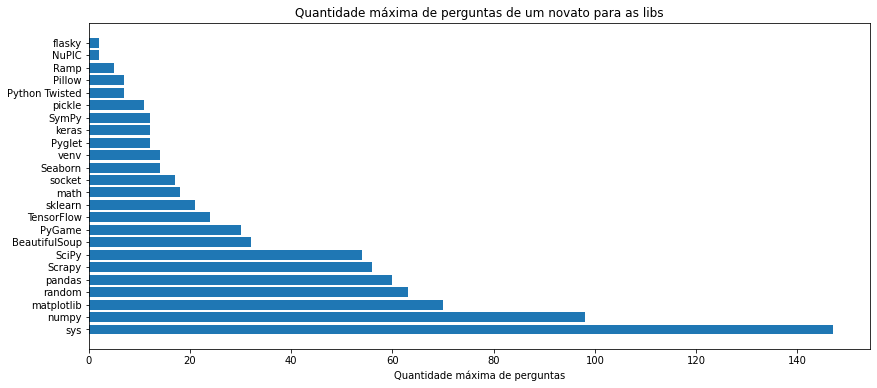

In [14]:
idxFigure = 1
dataResult = dataResult.sort_values(by=['qtd_max_ptgn'])

fig, ax = plt.subplots()

fig.set_size_inches(14, 6)
fig.savefig('./result/{}/{}. qtd_max.png'.format(prefix, idxFigure), dpi=100)

y_pos = np.arange(len(libTerms))

ax.barh(y_pos, dataResult['qtd_max_ptgn'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade máxima de perguntas de um novato para as libs')
ax.set_xlabel('Quantidade máxima de perguntas')

plt.show()

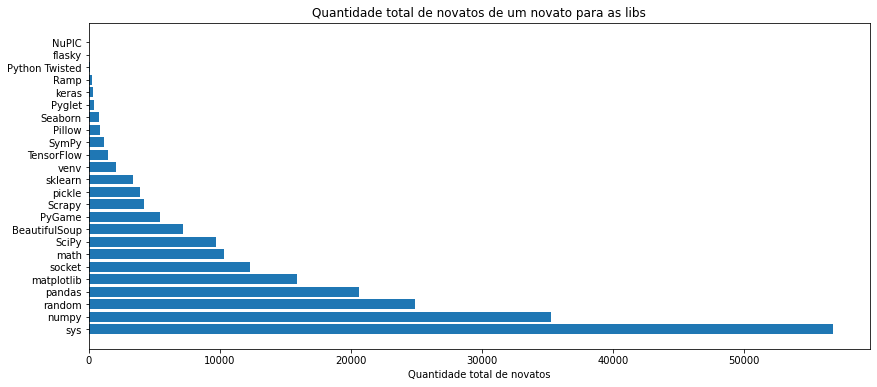

In [15]:
idxFigure = 2
dataResult = dataResult.sort_values(by=['qtd_max_newers'])

fig, ax = plt.subplots()

fig.set_size_inches(14, 6)
fig.savefig('./result/{}/{}. qtd_total.png'.format(prefix, idxFigure), dpi=100)

y_pos = np.arange(len(libTerms))

ax.barh(y_pos, dataResult['qtd_max_newers'].values.tolist(), align='center')
ax.set_yticks(y_pos, labels=dataResult['lib'].values.tolist())
ax.invert_yaxis()
ax.set_title('Quantidade total de novatos de um novato para as libs')
ax.set_xlabel('Quantidade total de novatos')

plt.show()

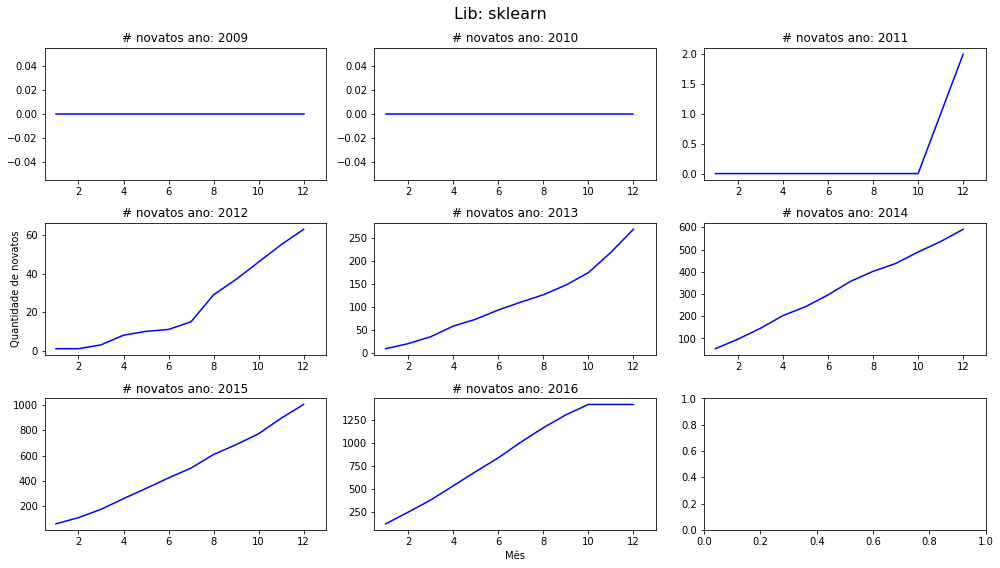

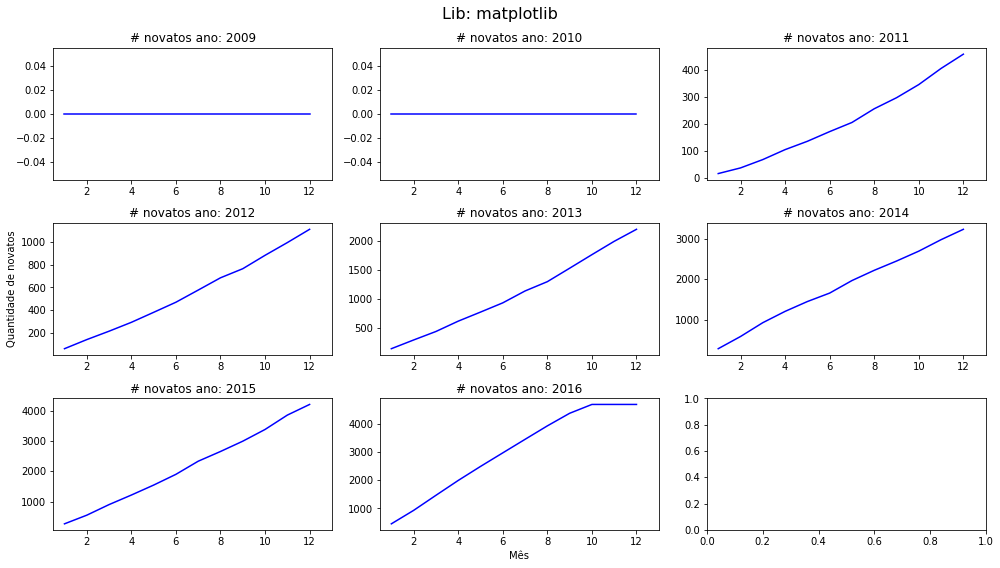

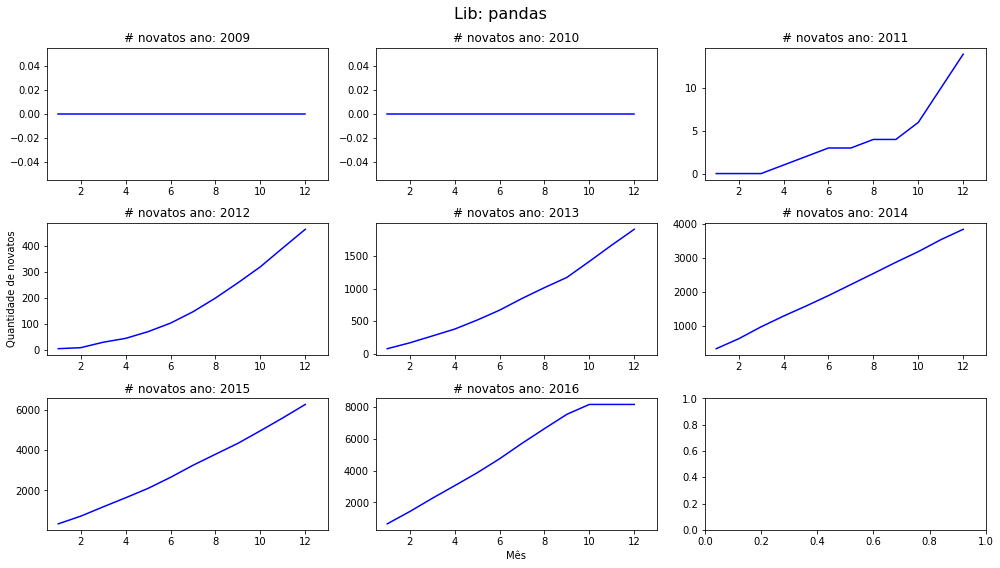

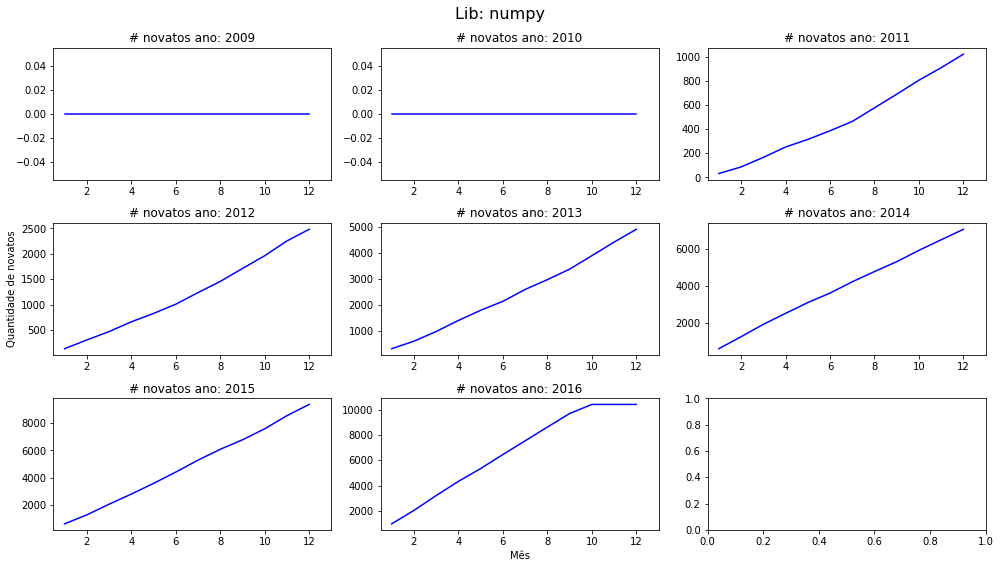

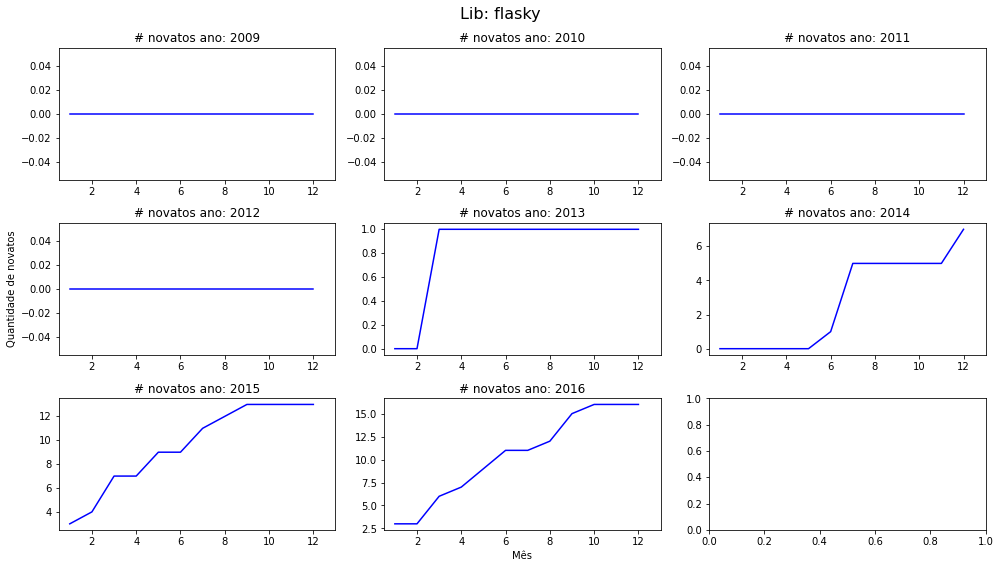

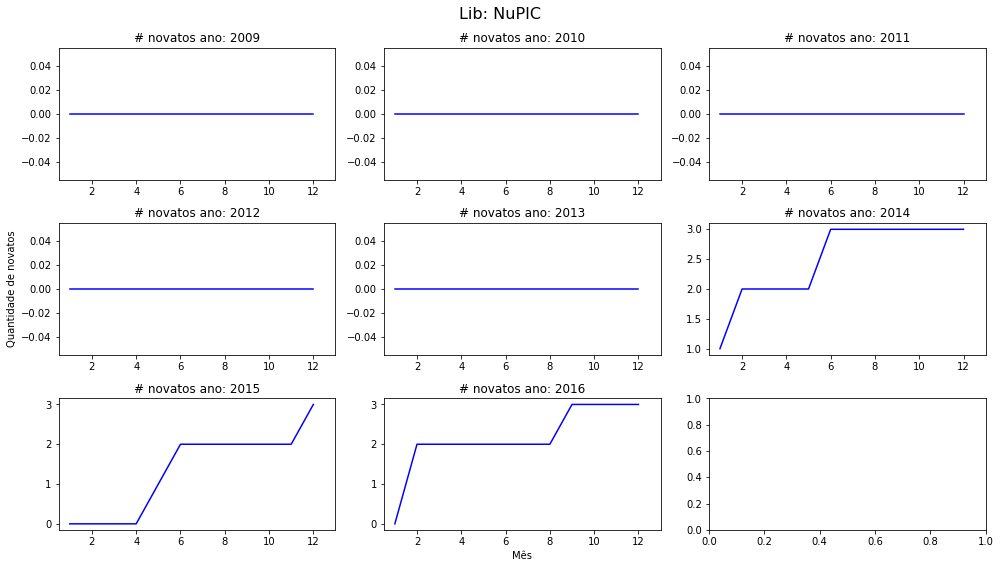

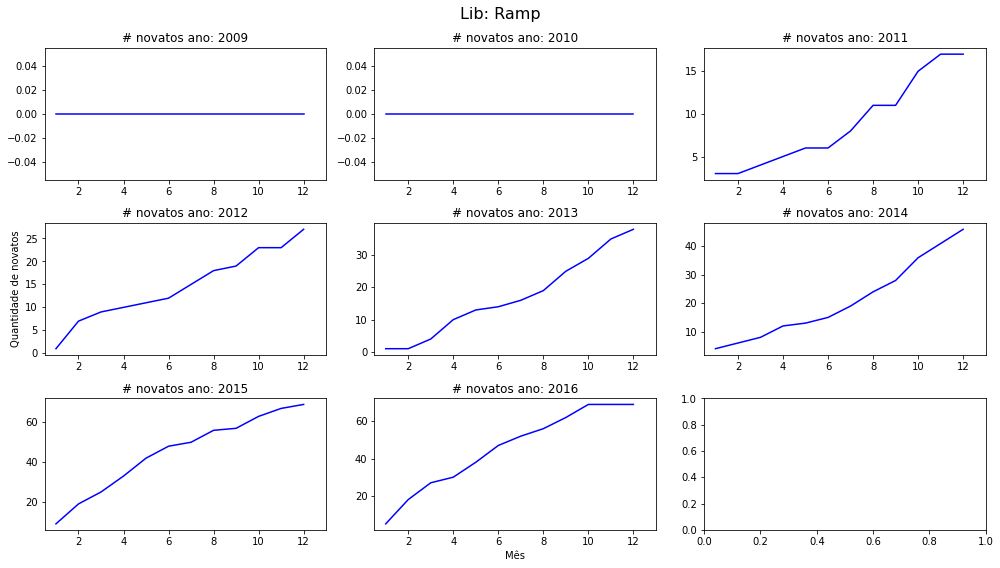

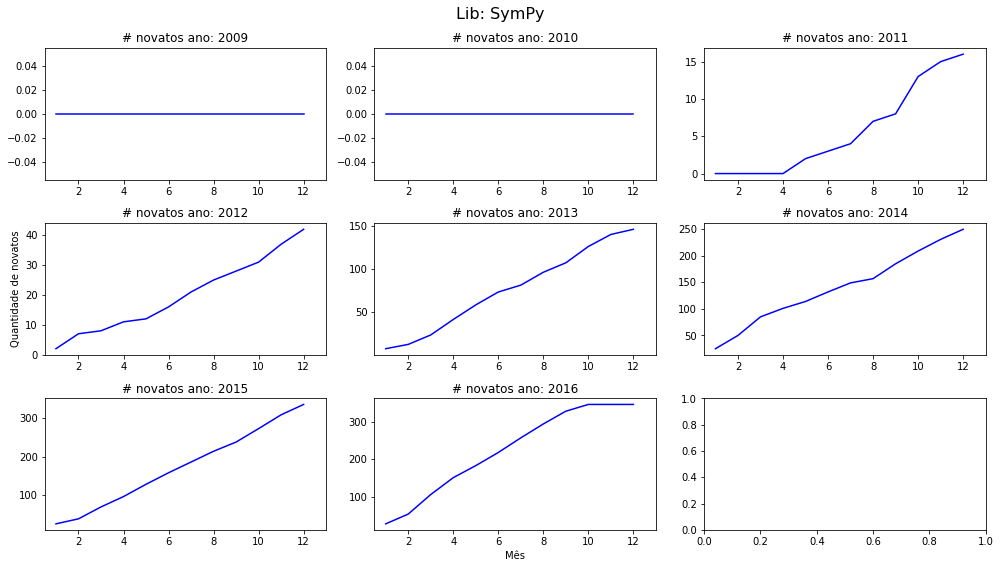

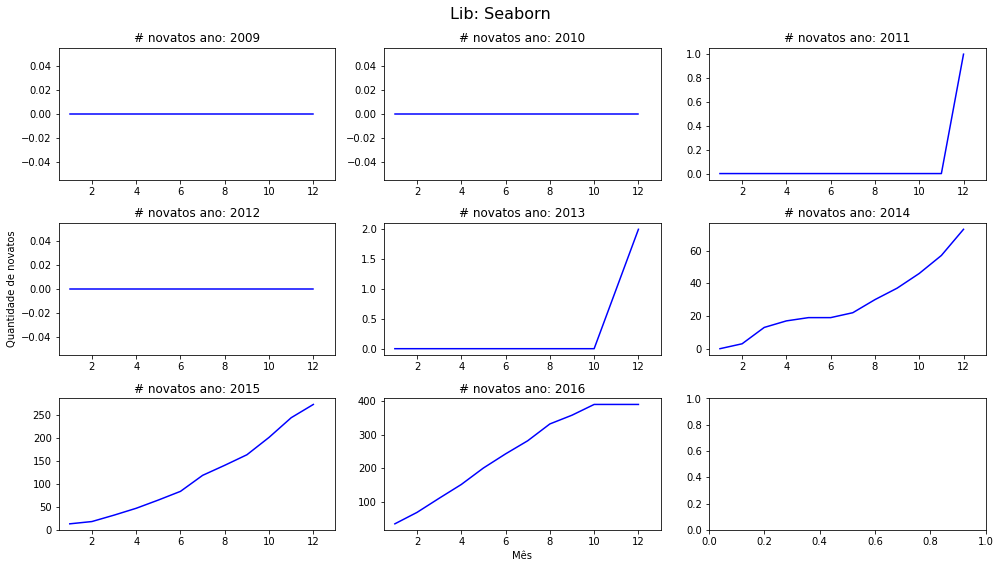

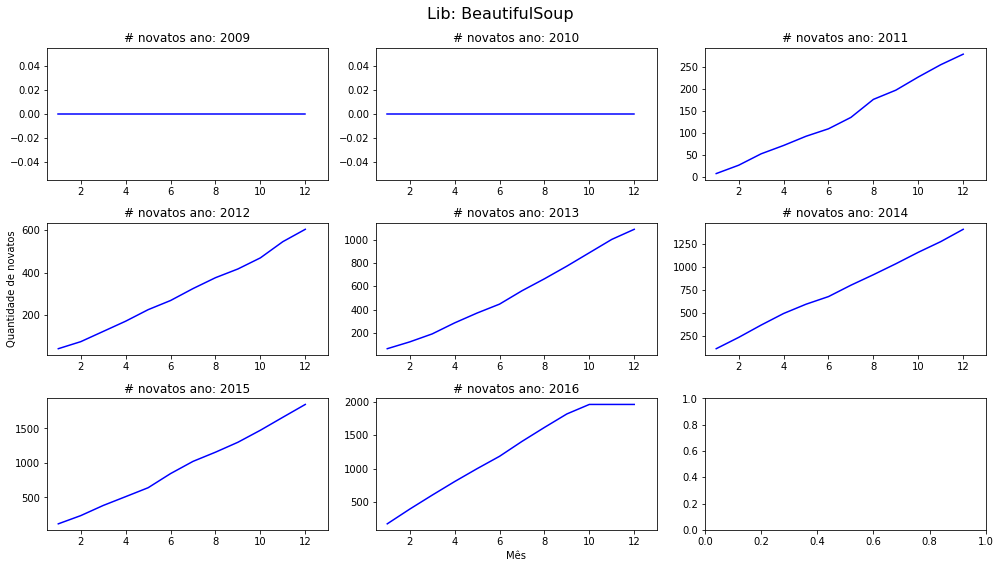

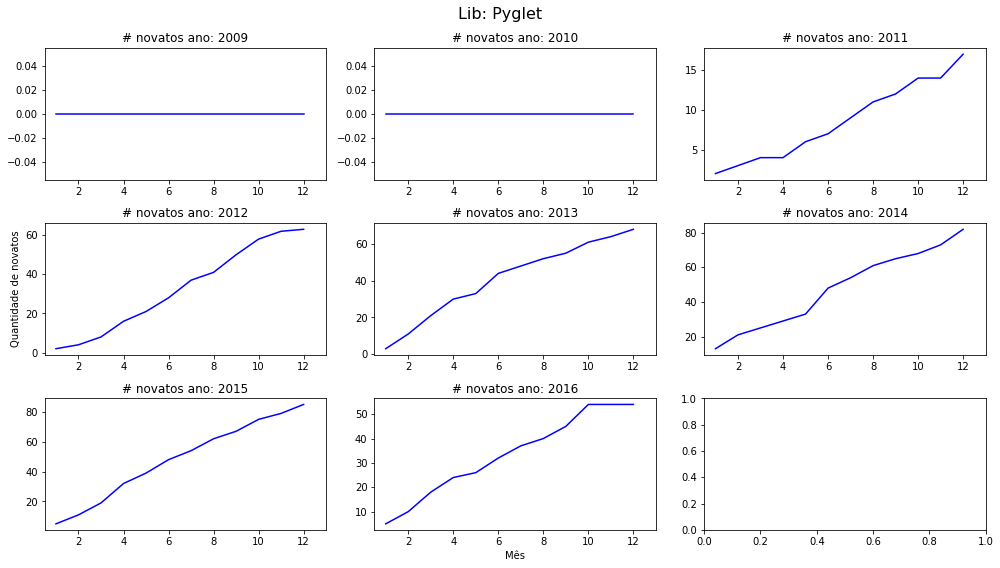

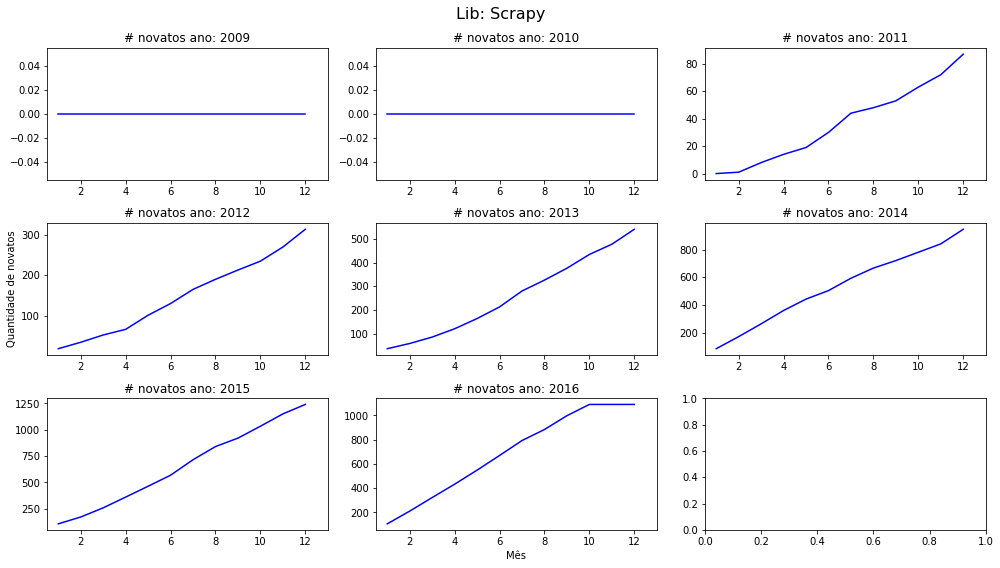

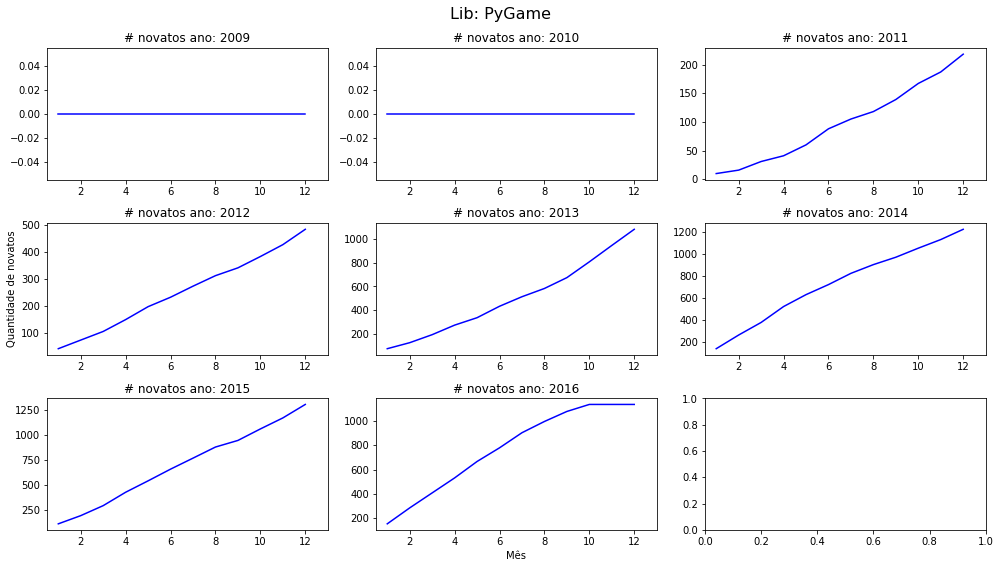

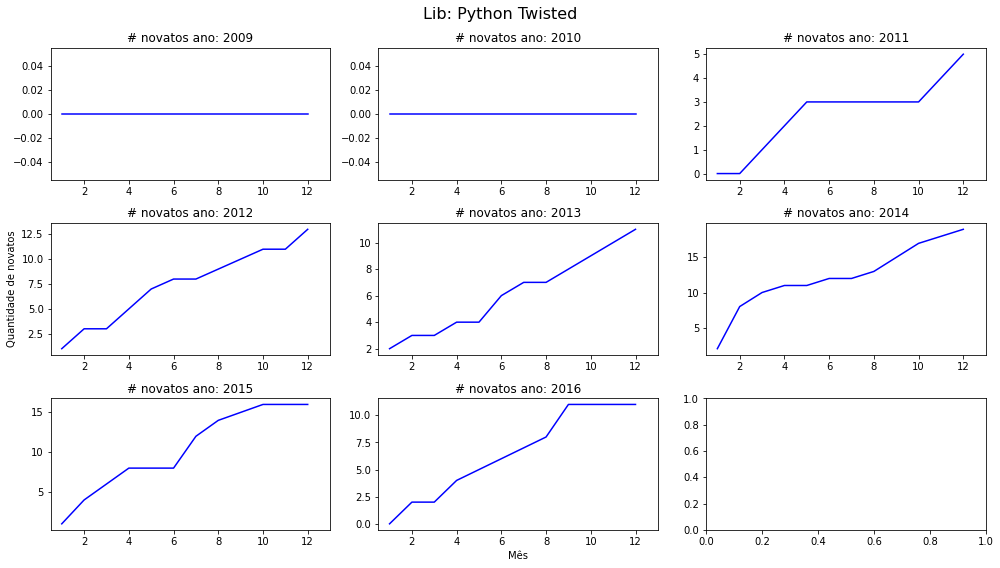

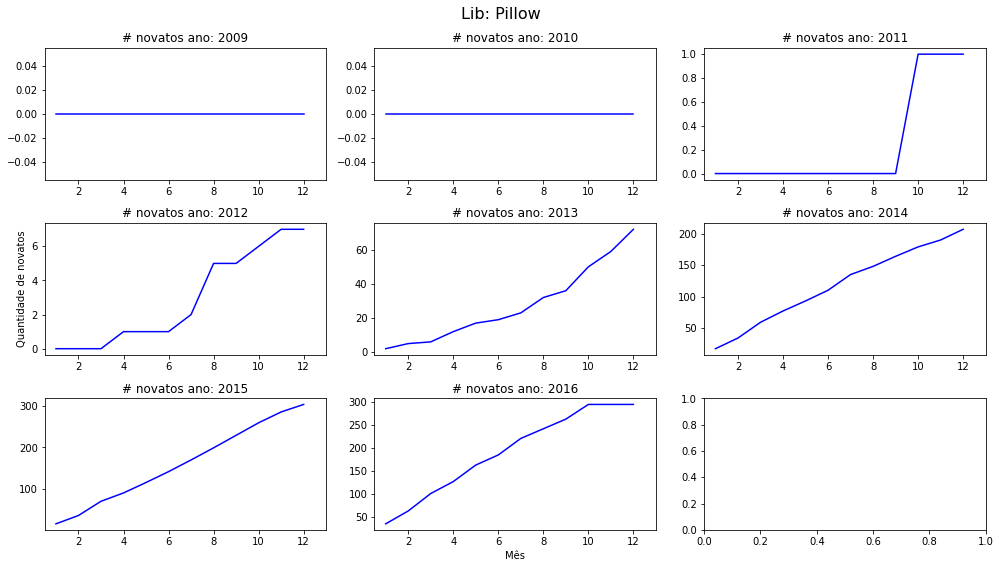

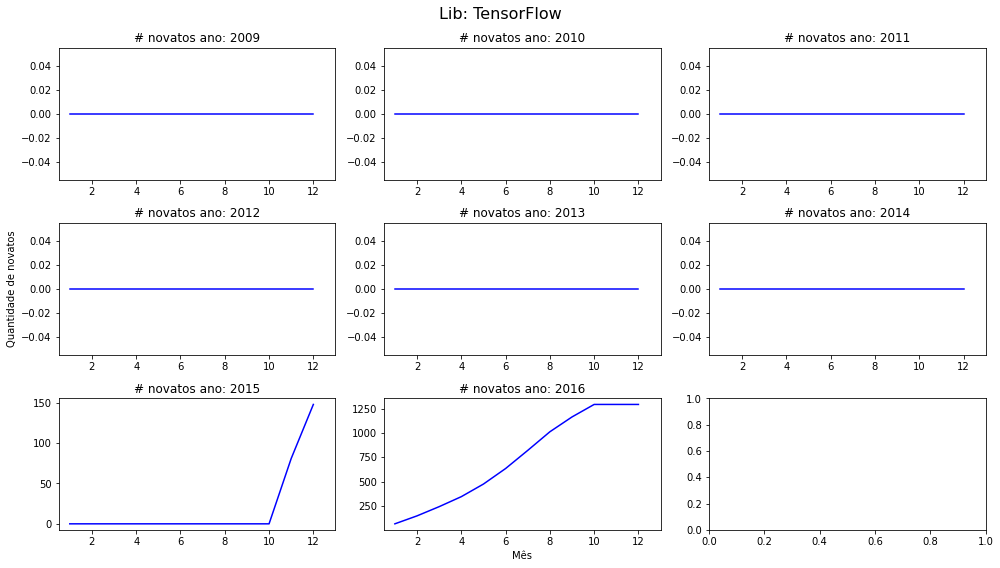

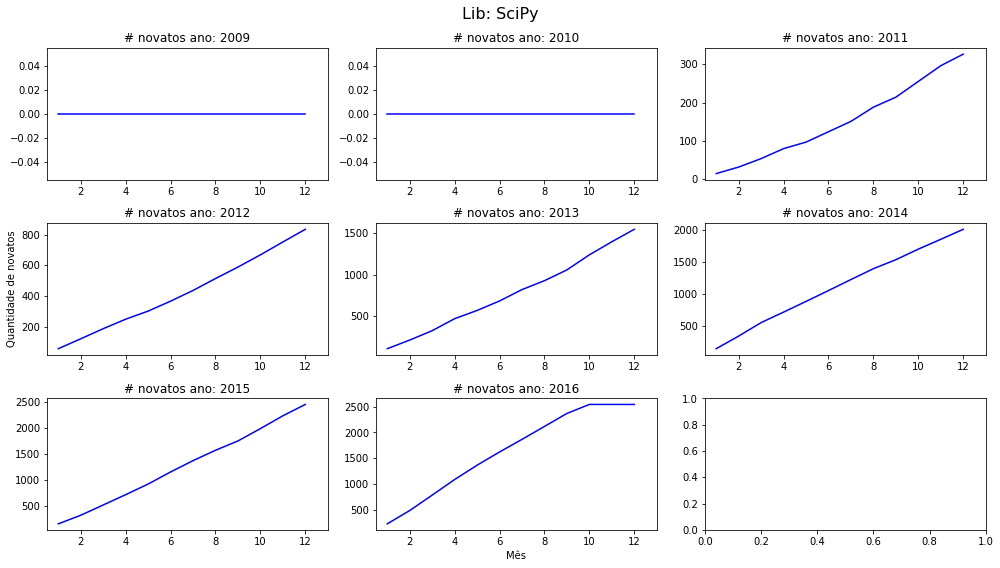

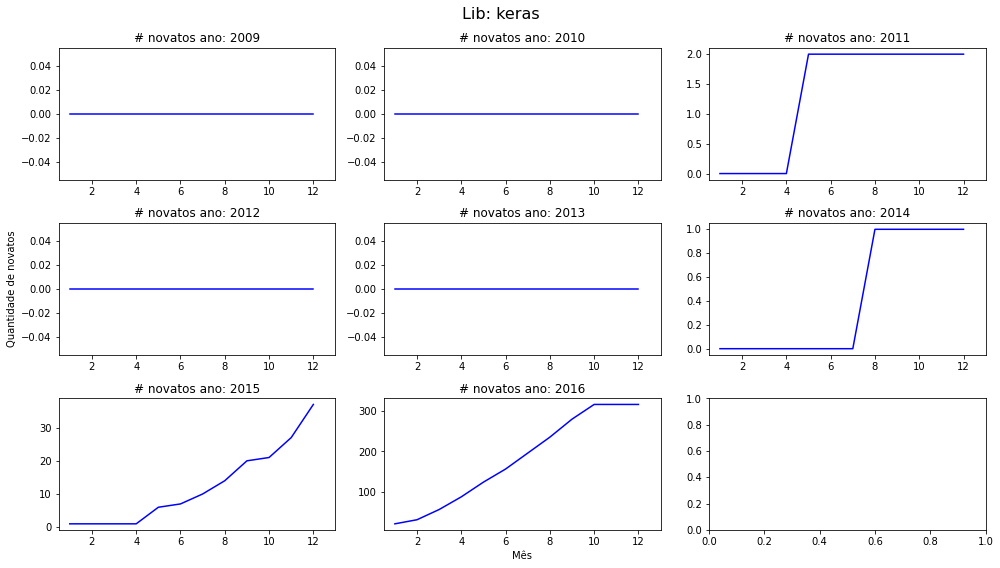

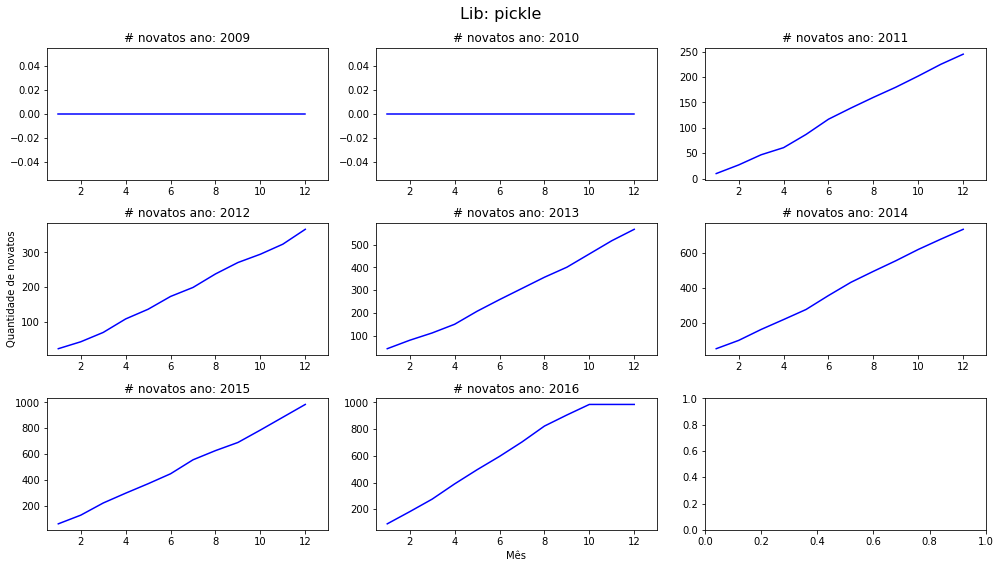

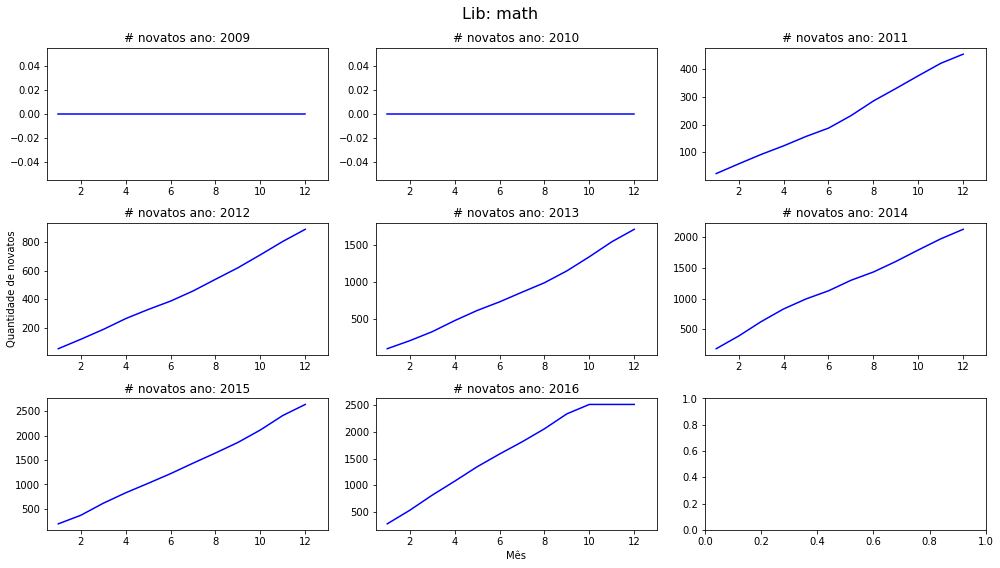

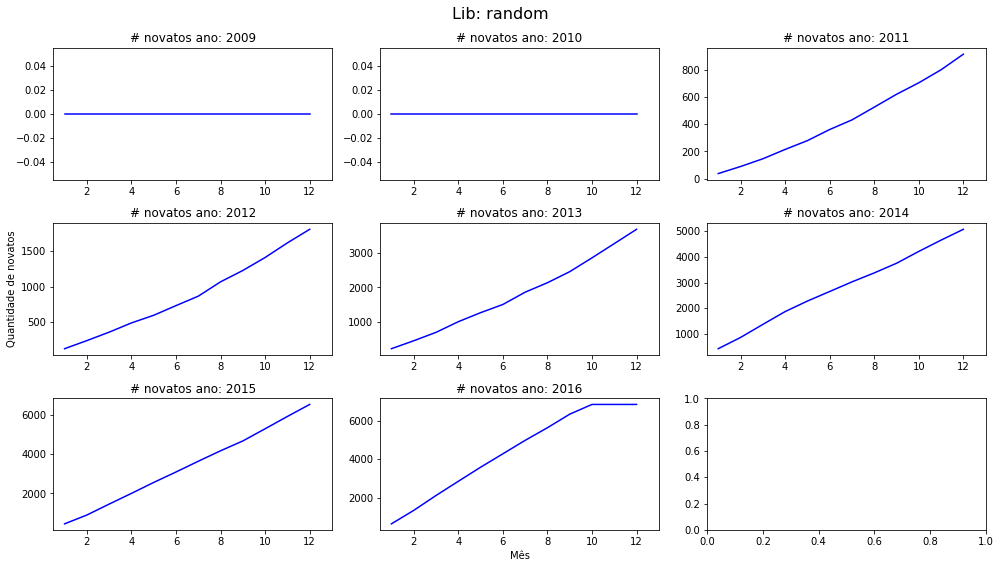

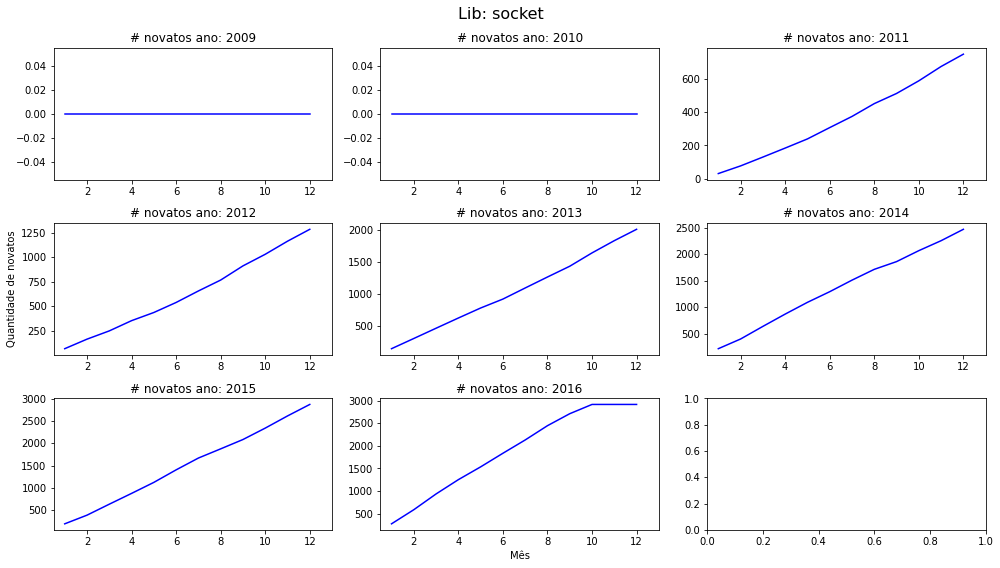

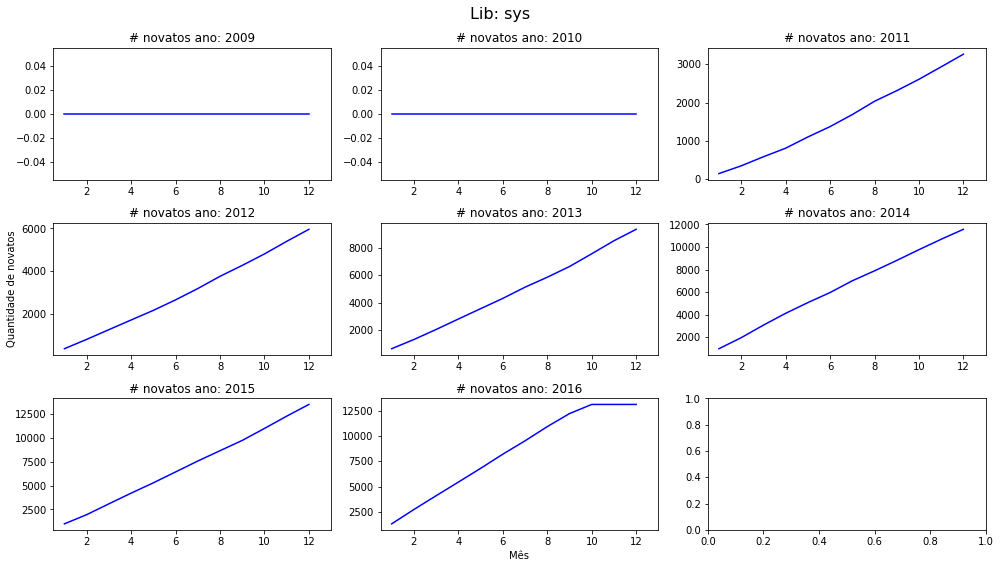

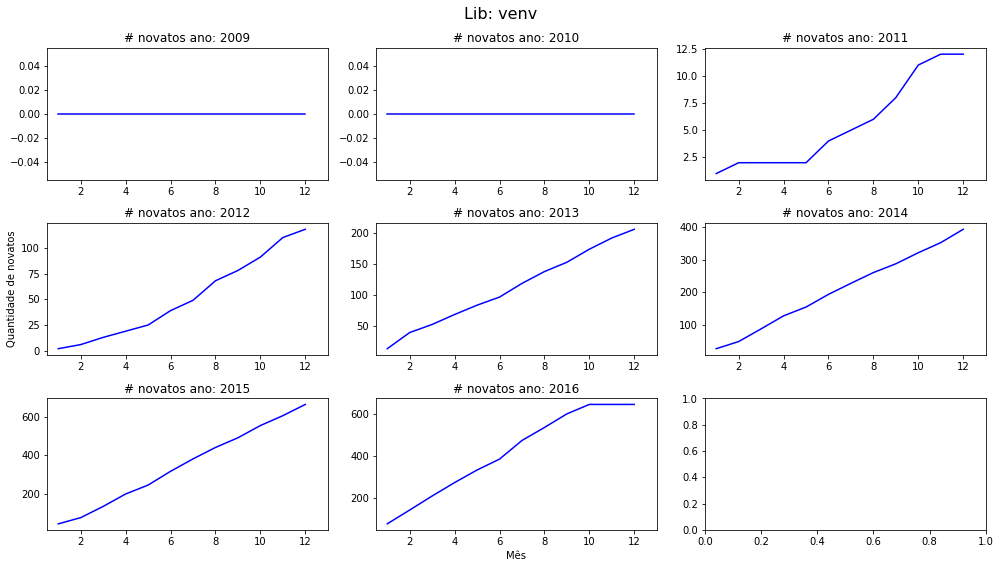

In [17]:
idxFigure = 3
libs = dataLanguage['Lib'].unique().tolist()

for lib in libs:
    dataLib = dataLanguage.loc[dataLanguage['Lib'] == lib]
    anos = dataLib['Year'].unique().tolist()
    fig, axs = plt.subplots(3, 3)
    fig.suptitle("Lib: " + lib, fontsize=16)
    fig.set_figwidth(14)
    fig.set_figheight(8)
    idxX = 0
    idxY = 0

    totalBckp = 0

    for ano in anos:
        dataLanguageAno = dataLib.loc[dataLib['Year'] == ano]
        y = sc.returnY(len(dataLanguageAno['Month'].unique().tolist()))
        x = []

        for mes in dataLanguageAno['Month'].unique().tolist():
            dataLanguageMes = dataLanguageAno.loc[dataLanguageAno['Month'] == mes]

            try:
                valueNewCommers = x[-1]
            except:
                valueNewCommers = 0
                # valueNewCommers = totalBckp

            valueNewCommers += dataLanguageMes['NewCommers'].sum()
            totalBckp += dataLanguageMes['NewCommers'].sum()
            x.append(valueNewCommers)

        axs[idxX][idxY].plot(y, x, color='blue')
        
        axs[idxX][idxY].set_title('# novatos ano: {}'.format(ano))

        if idxX == 1 and idxY == 0:
            axs[idxX][idxY].set_ylabel('Quantidade de novatos')
        
        if idxX == 2 and idxY == 1:
            axs[idxX][idxY].set_xlabel('Mês')
        
        axs[idxX][idxY].set_xlim(0.5, 13)

        # plt.ylim(x[0], x[-1] + 10)
        # plt.xlim(-1, 13)
        # plt.title('# novatos por mês para a lib {} no ano {}'.format(lib, ano))
        # plt.ylabel('Quantidade de novatos')
        # plt.xlabel('Mês')
        # plt.show()

        idxY += 1

        if idxY == 3:
            idxY = 0
            idxX += 1
        
    fig.tight_layout()
    plt.show()

    fig.savefig('result/{}/{}. {}_newcommers_years.png'.format(prefix, idxFigure, lib), dpi=fig.dpi, bbox_inches='tight')
    idxFigure += 1